Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit

Data loading and conversion

In [11]:
# Data loading
df = pd.read_csv('Similar_compounds_CellViability_for_plotting.csv')

# Select data
#df = df[~df['Condition'].str.contains('GC|TRPL PYO')]

# Split the 'Treatment' column into 'Compound' and 'Concentration'
df[['Compound', 'Concentration']] = df['Condition'].str.split('_', expand=True)

# Convert 'Concentration' to float
df['Concentration'] = df['Concentration'].astype(float)

df


,Unnamed: 0,Condition,Values,Compound,Concentration
0,0,GC_0,10.915820,GC,0.0
1,1,GC_0,4.625347,GC,0.0
2,2,GC_0,11.285850,GC,0.0
3,3,GC_0,11.100830,GC,0.0
4,4,GC_0,11.655870,GC,0.0
...,...,...,...,...,...
261,601,Positive Control_0,135.430200,Positive Control,0.0
262,602,Positive Control_0,103.230900,Positive Control,0.0
263,603,Positive Control_0,96.769110,Positive Control,0.0
264,604,Positive Control_0,80.838320,Positive Control,0.0


Plotting    

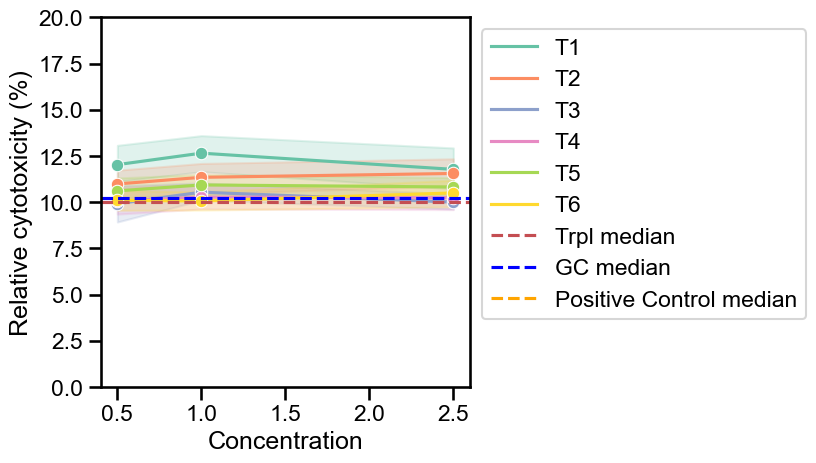

In [20]:
# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Create a list of compounds to exclude from the plot
exclude_compounds = ['Trpl', 'GC', 'Positive Control']

# Create a new DataFrame excluding the specified compounds
plot_df = df[~df['Compound'].isin(exclude_compounds)]

# Create a line plot with the filtered DataFrame
ax = sns.lineplot(data=plot_df, x='Concentration', y='Values', hue='Compound', style='Compound', marker='o', dashes=False, palette="Set2")

# Define colors for the dashed lines
colors = ['#C44E52', 'blue', 'orange']

# Calculate the median values of the excluded compounds and add them as dashed lines
for i, compound in enumerate(exclude_compounds):
    median_value = df[df['Compound'] == compound]['Values'].median()
    plt.axhline(y=median_value, linestyle='--', color=colors[i], label=f'{compound} median')

# Set plot title and labels
plt.xlabel('Concentration')
plt.ylabel('Relative cytotoxicity (%)')

# Move the legend
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Axis scale
ax.set_box_aspect(1)
ax.set_ylim(0, 20)

# Save the plot
plt.savefig('CellViability_similar_compounds' + '.pdf', bbox_inches='tight')
plt.show()
